Linear Regression

Root Mean Squared Error (RMSE): 0.7602
Mean Absolute Error (MAE): 0.6015


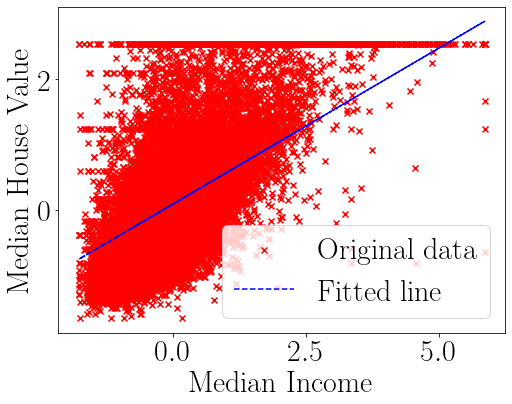

In [38]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('housing.csv')

X = data['median_income'].values.reshape(-1, 1).astype(np.float32)
y = data['median_house_value'].values.reshape(-1, 1).astype(np.float32)

X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)

class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

input_size = 1
output_size = 1
model = LinearRegression(input_size, output_size)

l1_lambda = 0.01

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
for epoch in range(num_epochs):
    
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    
    
    l1_reg = torch.tensor(0.)
    for param in model.parameters():
        l1_reg += torch.norm(param, p=1)
    
    loss += l1_lambda * l1_reg

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # if (epoch+1) % 100 == 0:
    #     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

predicted = model(X_tensor).detach().numpy()

rmse = np.sqrt(np.mean((predicted - y)**2))
mae = np.mean(np.abs(predicted - y))

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Set font style
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'text.usetex': True,
    'font.size': 30
})



plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='red', label='Original data', marker='x')
plt.plot(X, predicted, linestyle='dashed', color='blue', label='Fitted line')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.savefig('l1_housing.png', bbox_inches='tight')
plt.legend()
plt.show()


Root Mean Squared Error (RMSE): 0.7308
Mean Absolute Error (MAE): 0.5644


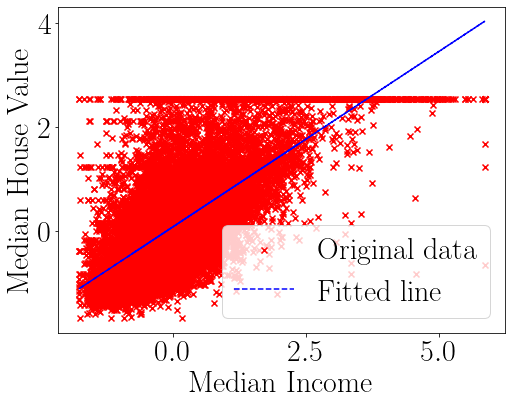

In [39]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('housing.csv')

X = data['median_income'].values.reshape(-1, 1).astype(np.float32)
y = data['median_house_value'].values.reshape(-1, 1).astype(np.float32)

X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)

class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

input_size = 1
output_size = 1
model = LinearRegression(input_size, output_size)

l2_lambda = 0.01

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
for epoch in range(num_epochs):
    
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    
    # L2 regularization term
    l2_reg = torch.tensor(0.)
    for param in model.parameters():
        l2_reg += torch.norm(param, p=2)
    
    loss += l2_lambda * l2_reg

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # if (epoch+1) % 100 == 0:
    #     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

predicted = model(X_tensor).detach().numpy()

rmse = np.sqrt(np.mean((predicted - y)**2))
mae = np.mean(np.abs(predicted - y))

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Set font style
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'text.usetex': True,
    'font.size': 30
})



plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='red', label='Original data', marker='x')
plt.plot(X, predicted, linestyle='dashed', color='blue', label='Fitted line')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.savefig('l2_housing.png', bbox_inches='tight')
plt.legend()
plt.show()

Root Mean Squared Error (RMSE): 0.7275
Mean Absolute Error (MAE): 0.5411


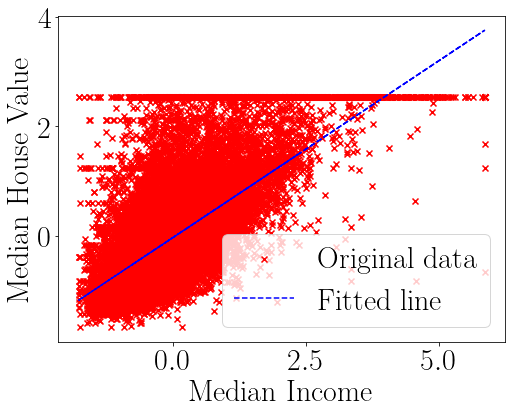

In [40]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('housing.csv')

X = data['median_income'].values.reshape(-1, 1).astype(np.float32)
y = data['median_house_value'].values.reshape(-1, 1).astype(np.float32)

X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)

class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

input_size = 1
output_size = 1
model = LinearRegression(input_size, output_size)

linf_lambda = 0.01

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
for epoch in range(num_epochs):
    
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    
    # L∞ regularization term
    linf_reg = torch.tensor(0.)
    for param in model.parameters():
        linf_reg = max(linf_reg, torch.max(torch.abs(param)))
    
    loss += linf_lambda * linf_reg

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # if (epoch+1) % 100 == 0:
    #     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

predicted = model(X_tensor).detach().numpy()

rmse = np.sqrt(np.mean((predicted - y)**2))
mae = np.mean(np.abs(predicted - y))

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Set font style
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'text.usetex': True,
    'font.size': 30
})



plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='red', label='Original data', marker='x')
plt.plot(X, predicted, linestyle='dashed', color='blue', label='Fitted line')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.savefig('linf_housing.png', bbox_inches='tight')
plt.legend()
plt.show()


Root Mean Squared Error (RMSE): 0.7264
Mean Absolute Error (MAE): 0.5468


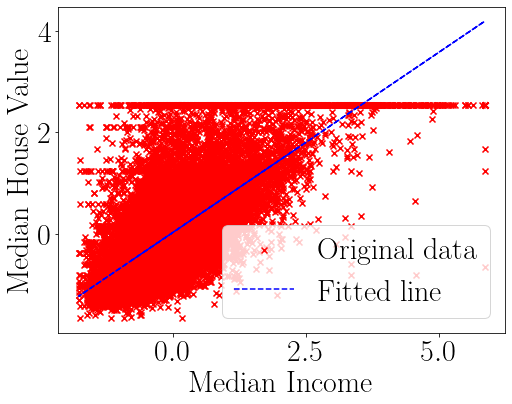

In [41]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('housing.csv')

X = data['median_income'].values.reshape(-1, 1).astype(np.float32)
y = data['median_house_value'].values.reshape(-1, 1).astype(np.float32)

X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)

class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

input_size = 1
output_size = 1
model = LinearRegression(input_size, output_size)

l2_mod_lambda = 0.01

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
for epoch in range(num_epochs):
    
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    
    
    l2_mod_reg = torch.tensor(0.)
    iter = (int)(1)
    for param in model.parameters():
        l2_mod_reg += torch.sum((param ** 2)/iter)
        iter = iter + 1
    loss += l2_mod_lambda * torch.sqrt(l2_mod_reg)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # if (epoch+1) % 100 == 0:
    #     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

predicted = model(X_tensor).detach().numpy()

rmse = np.sqrt(np.mean((predicted - y)**2))
mae = np.mean(np.abs(predicted - y))

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Set font style
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'text.usetex': True,
    'font.size': 30
})



plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='red', label='Original data', marker='x')
plt.plot(X, predicted, linestyle='dashed', color='blue', label='Fitted line')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.savefig('l2_mod_housing.png', bbox_inches='tight')
plt.legend()
plt.show()


Polynomial Regression

Root Mean Squared Error (RMSE): 0.7439
Mean Absolute Error (MAE): 0.5584


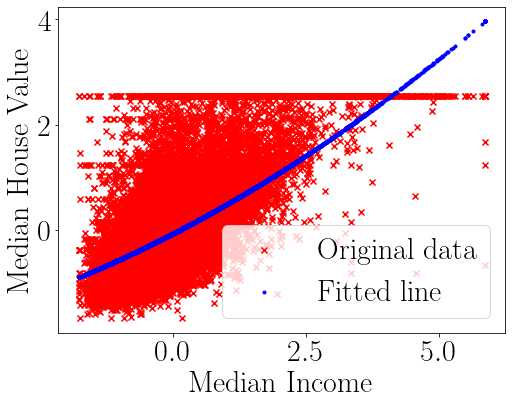

In [10]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv('housing.csv')

X = data['median_income'].values.reshape(-1, 1).astype(np.float32)
y = data['median_house_value'].values.reshape(-1, 1).astype(np.float32)

X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

poly_features = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_poly = poly_features.fit_transform(X)

X_tensor = torch.from_numpy(X_poly)
y_tensor = torch.from_numpy(y)

class PolynomialRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(PolynomialRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

input_size = X_poly.shape[1]
output_size = 1
model = PolynomialRegression(input_size, output_size)

l1_lambda = 0.01

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
for epoch in range(num_epochs):
    
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    
    
    l1_reg = torch.tensor(0.)
    for param in model.parameters():
        l1_reg += torch.norm(param, p=1)
    
    loss += l1_lambda * l1_reg

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

predicted = model(X_tensor).detach().numpy()

rmse = np.sqrt(np.mean((predicted - y)**2))
mae = np.mean(np.abs(predicted - y))

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Set font style
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'text.usetex': True,
    'font.size': 30
})

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], y, color='red', label='Original data', marker='x')
plt.scatter(X[:,0], predicted, color='blue', label='Fitted line', marker='.')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.savefig('l1_housing_poly.png', bbox_inches='tight')
plt.show()


Root Mean Squared Error (RMSE): 0.7448
Mean Absolute Error (MAE): 0.5568


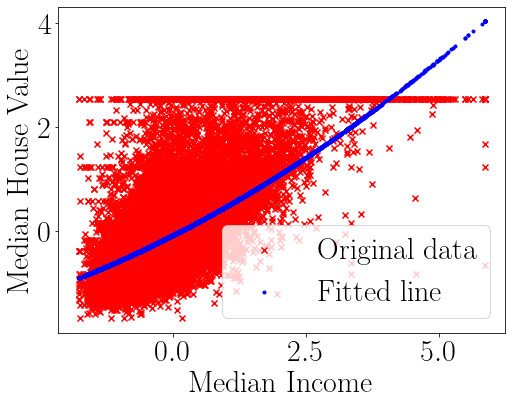

In [12]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv('housing.csv')

X = data['median_income'].values.reshape(-1, 1).astype(np.float32)
y = data['median_house_value'].values.reshape(-1, 1).astype(np.float32)

X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

poly_features = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_poly = poly_features.fit_transform(X)

X_tensor = torch.from_numpy(X_poly)
y_tensor = torch.from_numpy(y)

class PolynomialRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(PolynomialRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

input_size = X_poly.shape[1]
output_size = 1
model = PolynomialRegression(input_size, output_size)

l2_lambda = 0.01

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
for epoch in range(num_epochs):
    
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # L2 regularization term
    l2_reg = torch.tensor(0.)
    for param in model.parameters():
        l2_reg += torch.norm(param, p=2)
    
    loss += l2_lambda * l2_reg

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

predicted = model(X_tensor).detach().numpy()

rmse = np.sqrt(np.mean((predicted - y)**2))
mae = np.mean(np.abs(predicted - y))

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Set font style
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'text.usetex': True,
    'font.size': 30
})

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], y, color='red', label='Original data', marker='x')
plt.scatter(X[:,0], predicted, color='blue', label='Fitted line', marker='.')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.savefig('l2_housing_poly.png', bbox_inches='tight')
plt.show()


Root Mean Squared Error (RMSE): 0.7712
Mean Absolute Error (MAE): 0.5834


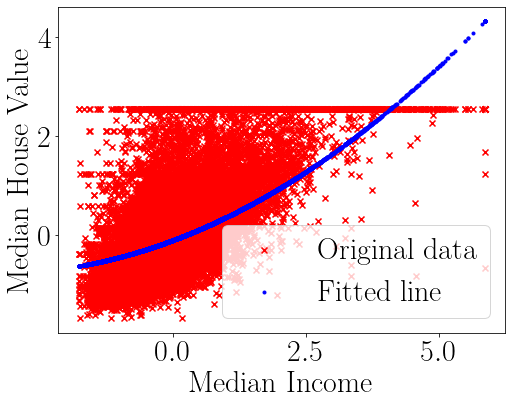

In [13]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv('housing.csv')

X = data['median_income'].values.reshape(-1, 1).astype(np.float32)
y = data['median_house_value'].values.reshape(-1, 1).astype(np.float32)

X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

poly_features = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_poly = poly_features.fit_transform(X)

X_tensor = torch.from_numpy(X_poly)
y_tensor = torch.from_numpy(y)

class PolynomialRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(PolynomialRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

input_size = X_poly.shape[1]
output_size = 1
model = PolynomialRegression(input_size, output_size)

linf_lambda = 0.01

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
for epoch in range(num_epochs):
    
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # L∞ regularization term
    linf_reg = torch.tensor(0.)
    for param in model.parameters():
        linf_reg = max(linf_reg, torch.max(torch.abs(param)))
    
    loss += linf_lambda * linf_reg

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

predicted = model(X_tensor).detach().numpy()

rmse = np.sqrt(np.mean((predicted - y)**2))
mae = np.mean(np.abs(predicted - y))

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Set font style
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'text.usetex': True,
    'font.size': 30
})

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], y, color='red', label='Original data', marker='x')
plt.scatter(X[:,0], predicted, color='blue', label='Fitted line', marker='.')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.savefig('linf_housing_poly.png', bbox_inches='tight')
plt.show()


Root Mean Squared Error (RMSE): 0.7240
Mean Absolute Error (MAE): 0.5486


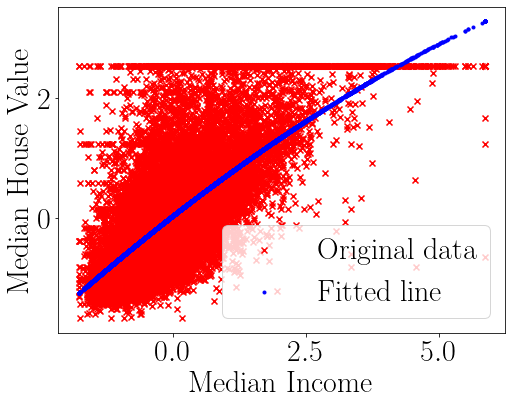

In [16]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv('housing.csv')

X = data['median_income'].values.reshape(-1, 1).astype(np.float32)
y = data['median_house_value'].values.reshape(-1, 1).astype(np.float32)

X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

poly_features = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_poly = poly_features.fit_transform(X)

X_tensor = torch.from_numpy(X_poly)
y_tensor = torch.from_numpy(y)

class PolynomialRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(PolynomialRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

input_size = X_poly.shape[1]
output_size = 1
model = PolynomialRegression(input_size, output_size)

l2_mod_lambda = 0.01

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
for epoch in range(num_epochs):
    
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    l2_mod_reg = torch.tensor(0.)
    iter = (int)(1)
    for param in model.parameters():
        l2_mod_reg += torch.sum((param ** 2)/iter)
        iter = iter + 1
    loss += l2_mod_lambda * torch.sqrt(l2_mod_reg)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

predicted = model(X_tensor).detach().numpy()

rmse = np.sqrt(np.mean((predicted - y)**2))
mae = np.mean(np.abs(predicted - y))

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Set font style
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'text.usetex': True,
    'font.size': 30
})

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], y, color='red', label='Original data', marker='x')
plt.scatter(X[:,0], predicted, color='blue', label='Fitted line', marker='.')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.savefig('l2_mod_housing_poly.png', bbox_inches='tight')
plt.show()